In [18]:
import matplotlib.pyplot as plt

In [15]:
# size, text, color, view, overlay, stack

import os
import json
import pandas as pd
import numpy as np

def count_properties(data):
    """Recursively count the occurrences of specific properties in JSON data."""
    # Initialize counts for various metrics
    counts = {
        'sparse': 0, 'contiguous': 0,
        'circular': 0, 'linear': 0,
        'parallel': 0, 'serial': 0, 'vertical': 0, 'horizontal': 0,
        'tracks_elements': 0,
        'point': 0, 'line': 0, 'area': 0, 'bar': 0, 'rect': 0, 'text': 0, 'rule': 0, 'brush': 0,
        'link': 0, 'triangle': 0,
        'quantitative': 0, 'nominal': 0, 'genomic': 0,
        'nominal_row': 0,
        'd2_size': 0,'default_size': 0,
        'd2_color': 0, 'default_color': 0,
        'd2_text': 0, 'default_text': 0,
        'stack': 0, 'overlay': 0,
        'views_elements': 0,
        'horizontal': 0,
        'vertical': 0,
        'visibility': 0,
        'linkingId': 0
    }

    # Define type sets for quick lookups
    sparse_types = {'json', 'csv', 'bed', 'beddb', 'vcf', 'gff'}
    contiguous_types = {'bigwig', 'multivec', 'vector', 'matrix', 'bam'}
    link_types = {'withinLink', 'betweenLink'}
    triangle_types = {'triangleLeft', 'triangleRight', 'triangleBottom'}
    
    if isinstance(data, dict):
        # Check specific fields and accumulate counts
        if 'layout' in data:
            if data['layout'] == 'circular':
                counts['circular'] += 1
            elif data['layout'] == 'linear':
                counts['linear'] += 1
        
        if 'arrangement' in data:
            if data['arrangement'] in counts:
                counts[data['arrangement']] += 1
        
        if 'mark' in data:
            if data['mark'] in counts:
                counts[data['mark']] += 1
            if data['mark'] in link_types:
                counts['link'] += 1
            if data['mark'] in triangle_types:
                counts['triangle'] += 1
        
        if 'data' in data and isinstance(data['data'], dict) and 'type' in data['data']:
            if data['data']['type'] in sparse_types:
                counts['sparse'] += 1
            if data['data']['type'] in contiguous_types:
                counts['contiguous'] += 1
        
        if 'y' in data and isinstance(data['y'], dict) and 'type' in data['y']:
            if data['y']['type'] in ['quantitative', 'nominal', 'genomic']:
                counts[data['y']['type']] += 1
        
        if 'tracks' in data and isinstance(data['tracks'], list):
            counts['tracks_elements'] += len(data['tracks'])
        
        if 'row' in data and isinstance(data['row'], dict) and 'type' in data['row']:
            if data['row']['type'] == 'nominal':
                counts['nominal_row'] += 1

        # Check if "size" object is a dictionary and if it has a "field" property
        if 'size' in data:
            if isinstance(data['size'], dict):  # Ensure 'size' is a dictionary
                if 'field' in data['size']:
                    counts['d2_size'] += 1
                else:
                    counts['default_size'] += 1

        # Check if "color" object is a dictionary and if it has a "field" property
        if 'color' in data:
            if isinstance(data['color'], dict):  # Ensure 'color' is a dictionary
                if 'field' in data['color']:
                    counts['d2_color'] += 1
                else:
                    counts['default_color'] += 1

        # Check if "text" object is a dictionary and if it has a "field" property
        if 'text' in data:
            if isinstance(data['text'], dict):  # Ensure 'color' is a dictionary
                if 'field' in data['text']:
                    counts['d2_text'] += 1
                else:
                    counts['default_text'] += 1

        # Check for "alignment" fields and accumulate counts
        if 'alignment' in data:
            if data['alignment'] == 'stack':
                counts['stack'] += 1
            elif data['alignment'] == 'overlay':
                counts['overlay'] += 1

         # Count elements in the "views" array if present
        if 'views' in data and isinstance(data['views'], list):
            counts['views_elements'] += len(data['views'])


        # Check for "orientation" fields and accumulate counts
        if 'orientation' in data:
            if data['orientation'] == 'horizontal':
                counts['horizontal'] += 1
            elif data['orientation'] == 'vertical':
                counts['vertical'] += 1

        # Check for 'visibility' and 'linkingId' fields and accumulate counts
        if 'visibility' in data:
            counts['visibility'] += 1
        if 'linkingId' in data:
            counts['linkingId'] += 1
            
        # Recursive call for nested dictionaries
        for value in data.values():
            nested_counts = count_properties(value)
            for key in counts:
                counts[key] += nested_counts[key]

    elif isinstance(data, list):
        # Recursive call for list items
        for item in data:
            nested_counts = count_properties(item)
            for key in counts:
                counts[key] += nested_counts[key]

    return counts

def process_json_files(data, name):
    counts = count_properties(data)
    
    # Check if both 'stack' and 'overlay' are zero and adjust 'stack' accordingly
    if counts['stack'] == 0 and counts['overlay'] == 0:
        counts['stack'] = 1

    # If both 'horizontal' and 'vertical' are zero, set 'stack' to 1
    if counts['horizontal'] == 0 and counts['vertical'] == 0:
        counts['horizontal'] = 1
    else:
        counts['horizontal'] = 0  # Add stack to the results to show adjustment

    # df = pd.DataFrame(counts)

    # return df
    return counts




In [16]:
gosSpec = {
    "title": "chr1 - KR Normalized matrix",
    "xDomain": {"chromosome": "chr1", "interval": [6000000, 10000000]},
    "tracks": [
        {
            "id": "https://higlass.io/api/v1/tileset_info/?d=ZCvntCKST0KUvQPGcCbJGA",
            "data": {
                "url": "https://higlass.io/api/v1/tileset_info/?d=ZCvntCKST0KUvQPGcCbJGA",
                "type": "matrix",
            },
            "mark": "bar",
            "x": {"field": "xs", "type": "genomic", "axis": "bottom"},
            "xe": {"field": "xe", "type": "genomic", "axis": "none"},
            "y": {"field": "ys", "type": "genomic", "axis": "left"},
            "ye": {"field": "ye", "type": "genomic"},
            "color": {
                "field": "value",
                "type": "quantitative",
                "range": "pink",
                "legend": "true",
            },
            "style": {"matrixExtent": "full"},
            "width": 600,
            "height": 400,
        }
    ],
}

query_embedding = np.array(list(process_json_files(gosSpec, "gosSpec").values()))
query_embedding


array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [33]:
df = pd.read_csv('embeddings/spec_embeddings.csv')

# Assume 'filename' is the column to exclude from embeddings
filename_spec = df['filename']

# Extract all other columns as embeddings
embeddings_spec = df.drop('filename', axis=1)
embeddings = np.array(embeddings_spec)
df.head()

,filename,sparse,contiguous,circular,linear,parallel,serial,vertical,horizontal,tracks_elements,...,default_size,d2_color,default_color,d2_text,default_text,stack,overlay,views_elements,visibility,linkingId
0,two_by_two_p_4_m_11_sw_1_0_s_1_0.json,0,4,0,6,0,2,1,0,4,...,3,0,0,0,0,1,0,6,0,0
1,multi_view_link_p_0_m_12_sw_2_0_s_1_0.json,0,3,1,2,0,0,1,0,3,...,0,3,0,0,0,1,0,4,0,0
2,single_cell_epi_simple_p_0_m_18_sw_0_7_s_0_7.json,3,7,0,2,0,0,1,0,14,...,0,3,8,0,0,0,2,2,0,0
3,two_horizontal_m_9_sw_1_2_s_1_2.json,0,2,0,4,0,1,0,1,2,...,2,0,0,0,0,1,0,2,0,0
4,basic_two_horizontal_orient_m_6_sw_1_0_s_1_0.json,0,2,0,2,0,0,1,0,2,...,2,0,0,0,0,1,0,0,0,0


In [32]:
from PIL import Image
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def most_similar(embedding, embeddings, top_n=5):
    similarities = np.array([cosine_similarity(embedding, emb) for emb in embeddings])
    return np.argsort(similarities)[::-1][:top_n]

def display_images(img_paths):
    # concatenate images horizontally and display
    images = [Image.open(img_path) for img_path in img_paths]
    padding = 100
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths) + padding * (len(images) - 1)
    max_height = max(heights)
    new_im = Image.new('RGB', (total_width, max_height))
    # Make the background white
    new_im.paste((255, 255, 255), (0, 0, total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0] + padding
    # open image with matplotlib
    plt.figure(figsize=(20, 20))
    plt.imshow(new_im)
    plt.axis('off')

['screenshots/warm_heatmap_sw_0_5_s_0_7.png',
 'screenshots/warm_heatmap_sw_0_7_s_0_7.png',
 'screenshots/warm_heatmap_sw_2_0_s_0_7.png',
 'screenshots/warm_heatmap_sw_1_0_s_0_5.png',
 'screenshots/gray_heatmap_sw_0_5_s_2_0.png']

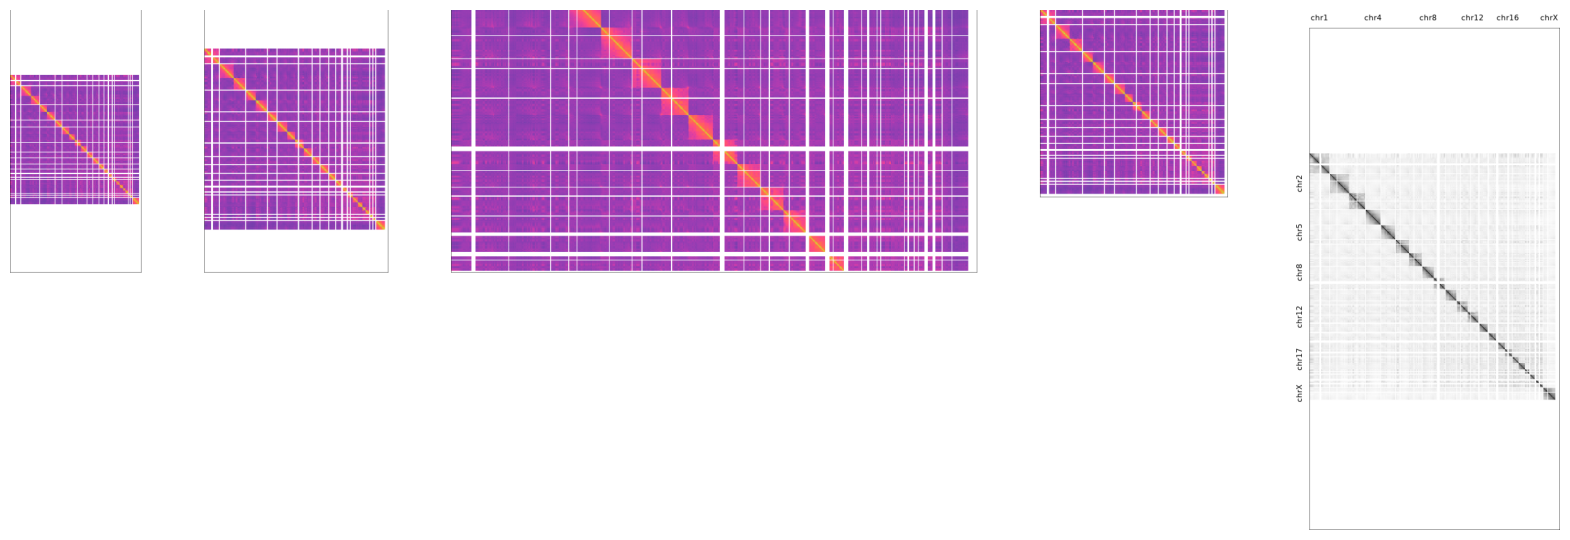

In [42]:
gosSpec = {
    "title": "chr1 - KR Normalized matrix",
    "xDomain": {"chromosome": "chr1", "interval": [6000000, 10000000]},
    "tracks": [
        {
            "id": "https://higlass.io/api/v1/tileset_info/?d=ZCvntCKST0KUvQPGcCbJGA",
            "data": {
                "url": "https://higlass.io/api/v1/tileset_info/?d=ZCvntCKST0KUvQPGcCbJGA",
                "type": "matrix",
            },
            "mark": "bar",
            "x": {"field": "xs", "type": "genomic", "axis": "bottom"},
            "xe": {"field": "xe", "type": "genomic", "axis": "none"},
            "y": {"field": "ys", "type": "genomic", "axis": "left"},
            "ye": {"field": "ye", "type": "genomic"},
            "color": {
                "field": "value",
                "type": "quantitative",
                "range": "pink",
                "legend": "true",
            },
            "style": {"matrixExtent": "full"},
            "width": 600,
            "height": 400,
        }
    ],
}

query_embedding = np.array(list(process_json_files(gosSpec, "gosSpec").values()))
query_embedding
# biomedCLIP_embeddings = np.array(biomedCLIP['clip_embeddings'].to_list())
top_5 = most_similar(query_embedding, embeddings, top_n=5)
img_paths = ["screenshots/" + spec.split(".")[0] + ".png" for spec in df.loc[top_5]['filename'].to_list()]
display_images(img_paths)
img_paths

['screenshots/two_vertical_m_1_sw_1_0_s_1_2.png',
 'screenshots/two_vertical_m_4_sw_2_0_s_1_0.png',
 'screenshots/basic_two_vertical_p_0_m_4_sw_1_2_s_0_7.png',
 'screenshots/two_vertical_m_4_sw_1_0_s_0_5.png',
 'screenshots/two_vertical_m_4_sw_1_0_s_1_2.png']

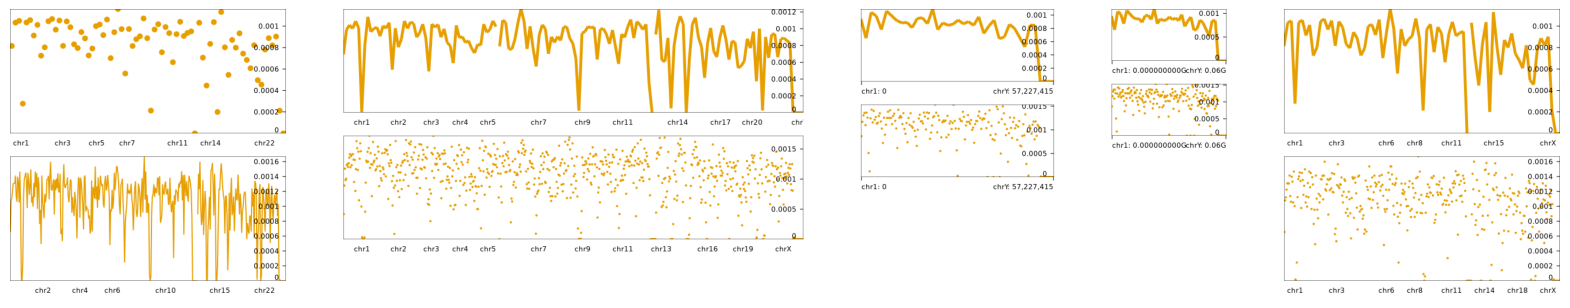

In [40]:
two_track = {
  "xDomain":{
    "chromosome": "chr1"
  },
  "tracks": [
    {
      "layout": "linear",
      "width": 600,
      "height": 50,
      "data": {
        "url": "https://resgen.io/api/v1/tileset_info/?d=UvVPeLHuRDiYA3qwFlm7xQ",
        "type": "multivec",
        "row": "sample",
        "column": "position",
        "value": "peak",
        "categories": ["sample 1"],
        "binSize": 5
      },
      "mark": "point",
      "x": {"field": "start", "type": "genomic", "axis": "bottom"},
      "xe": {"field": "end", "type": "genomic"},
      "y": {"field": "peak", "type": "quantitative", "axis": "right"},
      "size": {"value": 5}
    },
    {
      "layout": "linear",
      "width": 600,
      "height": 50,
      "data": {
        "url": "https://resgen.io/api/v1/tileset_info/?d=UvVPeLHuRDiYA3qwFlm7xQ",
        "type": "multivec",
        "row": "sample",
        "column": "position",
        "value": "peak",
        "categories": ["sample 1"],
        "binSize": 5
      },
      "mark": "line",
      "x": {"field": "start", "type": "genomic", "axis": "bottom"},
      "xe": {"field": "end", "type": "genomic"},
      "y": {"field": "peak", "type": "quantitative", "axis": "right"},
      "size": {"value": 5}
    }
  ]
}

query_embedding = np.array(list(process_json_files(two_track, "gosSpec").values()))
# biomedCLIP_embeddings = np.array(biomedCLIP['clip_embeddings'].to_list())
top_5 = most_similar(query_embedding, embeddings, top_n=5)
img_paths = ["screenshots/" + spec.split(".")[0] + ".png" for spec in df.loc[top_5]['filename'].to_list()]
display_images(img_paths)
img_paths

['screenshots/single_cell_epi_p_0_m_7_sw_1_2_s_1_2.png',
 'screenshots/single_cell_epi_p_0_m_7_sw_0_7_s_0_7.png',
 'screenshots/single_cell_epi_p_0_m_7_sw_1_0_s_1_0.png',
 'screenshots/single_cell_epi_p_0_m_7_sw_0_7_s_1_0.png',
 'screenshots/single_cell_epi_p_0_m_22_sw_0_7_s_1_2.png']

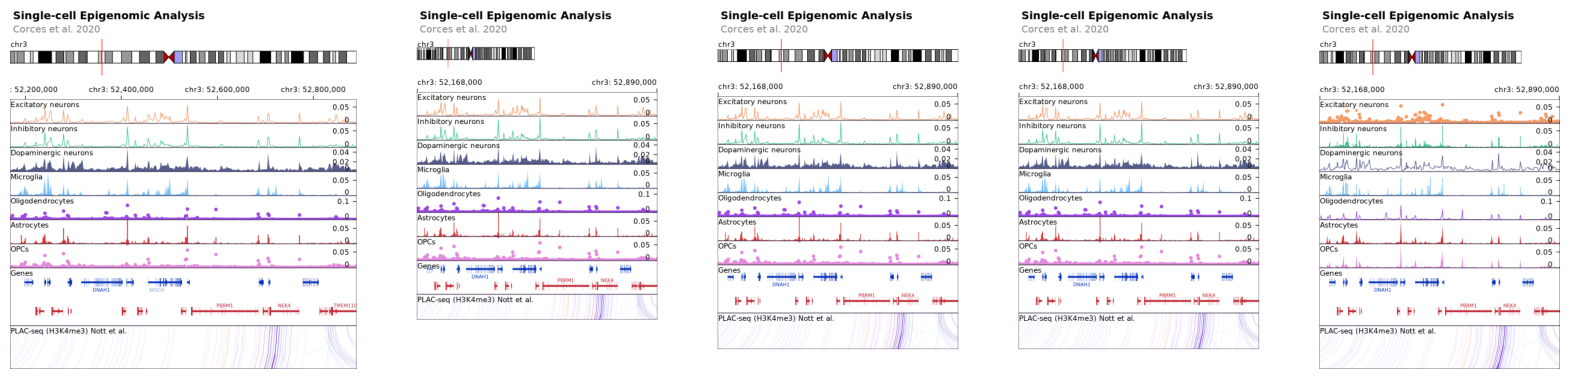

In [41]:
ideogram = {
    "layout": "linear",
    "xDomain": {"chromosome": "chr3"},
    "centerRadius": 0.8,
    "tracks": [
        {
            "alignment": "overlay",
            "title": "chr3",
            "data": {
                "url": "https://raw.githubusercontent.com/sehilyi/gemini-datasets/master/data/cytogenetic_band.csv",
                "type": "csv",
                "chromosomeField": "Chr.",
                "genomicFields": [
                    "ISCN_start",
                    "ISCN_stop",
                    "Basepair_start",
                    "Basepair_stop",
                ],
            },
            "tracks": [
                {
                    "mark": "rect",
                    "dataTransform": [
                        {
                            "type": "filter",
                            "field": "Stain",
                            "oneOf": ["acen-1", "acen-2"],
                            "not": "true",
                        }
                    ],
                    "color": {
                        "field": "Density",
                        "type": "nominal",
                        "domain": ["", "25", "50", "75", "100"],
                        "range": ["white", "#D9D9D9", "#979797", "#636363", "black"],
                    },
                    "size": {"value": 20},
                },
                {
                    "mark": "rect",
                    "dataTransform": [
                        {"type": "filter", "field": "Stain", "oneOf": ["gvar"]}
                    ],
                    "color": {"value": "#A0A0F2"},
                    "size": {"value": 20},
                },
                {
                    "mark": "triangleRight",
                    "dataTransform": [
                        {"type": "filter", "field": "Stain", "oneOf": ["acen-1"]}
                    ],
                    "color": {"value": "#B40101"},
                    "size": {"value": 20},
                },
                {
                    "mark": "triangleLeft",
                    "dataTransform": [
                        {"type": "filter", "field": "Stain", "oneOf": ["acen-2"]}
                    ],
                    "color": {"value": "#B40101"},
                    "size": {"value": 20},
                },
                {
                    "mark": "brush",
                    "x": {"linkingId": "detail"},
                    "color": {"value": "red"},
                    "opacity": {"value": 0.3},
                    "strokeWidth": {"value": 1},
                    "stroke": {"value": "red"},
                },
            ],
            "x": {"field": "Basepair_start", "type": "genomic", "axis": "none"},
            "xe": {"field": "Basepair_stop", "type": "genomic"},
            "stroke": {"value": "black"},
            "strokeWidth": {"value": 1},
            "style": {"outlineWidth": 0},
            "width": 400,
            "height": 25,
        }
    ],
}

query_embedding = np.array(list(process_json_files(ideogram, "gosSpec").values()))
# biomedCLIP_embeddings = np.array(biomedCLIP['clip_embeddings'].to_list())
top_5 = most_similar(query_embedding, embeddings, top_n=5)
img_paths = [
    "screenshots/" + spec.split(".")[0] + ".png"
    for spec in df.loc[top_5]["filename"].to_list()
]
display_images(img_paths)
img_paths